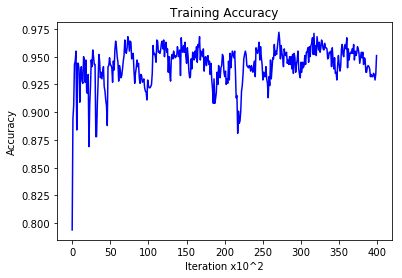

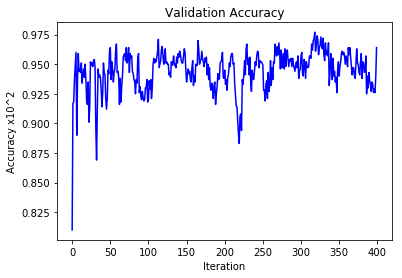

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Variable

images = np.load("D:/work/JHUschoolStuff/machinelearning/project1/cs475_project_data/images.npy")
labels = np.load("D:/work/JHUschoolStuff/machinelearning/project1/cs475_project_data/labels.npy")
height = images.shape[1]
width = images.shape[2]
size = height*width
data = images.reshape(images.shape[0],size)
training = 40000
validation = 45000
testing = 50000
apple_label = 0
rate = 1
iterations = 1

w = Variable(torch.zeros(size), requires_grad=True).float()
accuracies = np.zeros(400)
val_accuracies = np.zeros(400)

w = fit(data, w, rate, iterations, accuracies, val_accuracies)
y_hat = prediction(w, data)



In [7]:
def fit(data, w, rate, iterations, accuracies, val_accuracies):
    for k in range(0, iterations):
        count = 0
        count_2 = 0
        if(w.grad != None):
            w.grad.data.zero_()
        for i in range(0, 40000):
            x = torch.from_numpy(data[i]).float()
            X_= Variable(x)
            val = 1
            if labels[i] != 0:
                val = -1
            dot_product = -1*val*w.dot(X_)
            loss = torch.max(Variable(torch.zeros(1)), dot_product)
            loss.backward()
            w.data = w.data - rate*w.grad.data

            if i % 100 == 0:
                y_hat = np.zeros(1000)
                y = np.zeros(1000)
                for j in range(0, 1000):
                    s = np.random.randint(0,40000)
                    dat = torch.from_numpy(data[s]).float()
                    if np.sign(torch.dot(dat, w.data)) < 0:
                        y_hat[j] = 0.0
                    else:
                        y_hat[j] = 1.0
                    if labels[s] == 0:
                        y[j] = 1.0
                    else:
                        y[j] = 0.0
                accuracies[count] = accuracy(y, y_hat)
                count = count + 1
                for l in range(0, 1000):
                    s = np.random.randint(40000,45000)
                    dat = torch.from_numpy(data[s]).float()
                    if np.sign(torch.dot(dat, w.data)) < 0:
                        y_hat[l] = 0.0
                    else:
                        y_hat[l] = 1.0
                    if labels[s] == 0:
                        y[l] = 1.0
                    else:
                        y[l] = 0.0
                val_accuracies[count_2] = accuracy(y, y_hat)
                count_2 = count_2 + 1
    plt.figure(200)
    plt.title('Training Accuracy')
    plt.xlabel('Iteration x10^2')
    plt.ylabel('Accuracy')
    plt.plot(accuracies, 'b')
    plt.show()
    plt.figure(300)
    plt.title('Validation Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy x10^2')
    plt.plot(val_accuracies, 'b')
    plt.show()
    return w




In [3]:
def prediction(w, data):
    y_hat = np.zeros(5000)
    for j in range(45000, 50000):
        dat = torch.from_numpy(data[j]).float()
        if np.sign(torch.dot(dat, w.data)) < 0:
            y_hat[j - 45000] = 0.0
        else:
            y_hat[j - 45000] = 1.0
    return y_hat

In [4]:
def accuracy(y, y_hat):
    return (y == y_hat).astype(np.float).mean()

For randomly flipping a coin to declare an example as apple or not apple will yield an accuracy of 50% because with a coin flip we have a 50-50 chance of getting a certain prediction correct.

In [5]:
datApple = labels[labels == 0] #10000 apple examples, 40000 non apple
print(datApple.size) #majority is not apple thus we will predict not 
                    #apple for all
print(40000/50000) #thus our accuracy will be 80%

10000
0.8


With majority vote, the majority vote is not apple with 80% of examples
that are not apple. Thus in predicting not apple will give us an accuracy
of 80%

Not Overfitting
    Looking at the graphs, our validation accuracies are close to what
    our training data accuracies are. Had our training accuracies been
    much better than our validation accuracies then its possible that
    we were overfitting to our training data, but in this case since both 
    accuracies are about the same it is unlikely we are overfitting.